In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
import os
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
wt = pd.read_csv("weatherAUS.csv")

In [3]:
wt.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
wt.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [6]:
wt.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [7]:
wt[wt==0].count()

Date                 0
Location             0
MinTemp            156
MaxTemp             14
Rainfall         90275
Evaporation        240
Sunshine          2308
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am      8612
WindSpeed3pm      1096
Humidity9am          1
Humidity3pm          4
Pressure9am          0
Pressure3pm          0
Cloud9am          8587
Cloud3pm          4957
Temp9am             35
Temp3pm             16
RainToday            0
RISK_MM          91077
RainTomorrow         0
dtype: int64

In [8]:
wt.shape

(142193, 24)

Here numerical columns are field with mean values

In [9]:
wt['MinTemp'].mean()
wt.MinTemp = wt.MinTemp.fillna(12.18)

In [10]:
wt['MaxTemp'].mean()
wt.MaxTemp = wt.MaxTemp.fillna(23.22)

In [11]:
wt['Rainfall'].mean()
wt.Rainfall = wt.Rainfall.fillna(2.34)

In [12]:
wt['Evaporation'].mean()
wt.Evaporation = wt.Evaporation.fillna(5.46)

In [13]:
wt['Sunshine'].mean()
wt.Sunshine = wt.Sunshine.fillna(7.62)

In [14]:
wt['WindGustSpeed'].mean()
wt.WindGustSpeed = wt.WindGustSpeed.fillna(39.98)

In [15]:
wt['WindSpeed9am'].mean()
wt.WindSpeed9am = wt.WindSpeed9am.fillna(14.0)

In [16]:
wt['WindSpeed3pm'].mean()
wt.WindSpeed3pm = wt.WindSpeed3pm.fillna(18.63)

In [17]:
wt['Humidity3pm'].mean()
wt.Humidity3pm = wt.Humidity3pm.fillna(51.48)

In [18]:
wt['Humidity9am'].mean()
wt.Humidity9am = wt.Humidity9am.fillna(68.84)

In [19]:
wt['Pressure9am'].mean()
wt.Pressure9am = wt.Pressure9am.fillna(1017.65)

In [20]:
wt['Pressure3pm'].mean()
wt.Pressure3pm = wt.Pressure3pm.fillna(1015.25)

In [21]:
wt['Temp3pm'].mean()
wt.Temp3pm = wt.Temp3pm.fillna(21.68)

In [22]:
wt['Temp9am'].mean()
wt.Temp9am = wt.Temp9am.fillna(16.98)

In [23]:
wt['Cloud3pm'].mean()
wt.Cloud3pm = wt.Cloud3pm.fillna(4.50)

In [24]:
wt['Cloud9am'].mean()
wt.Cloud9am = wt.Cloud9am.fillna(4.43)

Categorical values are replaced with the max value counts

In [25]:
wt.WindGustDir = wt.WindGustDir.fillna("W")
wt.WindDir9am = wt.WindDir9am.fillna("N")
wt.WindDir3pm = wt.WindDir3pm.fillna("SE")
wt.RainToday = wt.RainToday.fillna("No")

In [26]:
wt.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [27]:
wt.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.60,5.46,7.62,W,44.0,W,...,22.0,1007.7,1007.1,8.00,4.5,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.00,5.46,7.62,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.43,4.5,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.00,5.46,7.62,WSW,46.0,W,...,30.0,1007.6,1008.7,4.43,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.00,5.46,7.62,NE,24.0,SE,...,16.0,1017.6,1012.8,4.43,4.5,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.00,5.46,7.62,W,41.0,ENE,...,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.20,5.46,7.62,WNW,56.0,W,...,23.0,1009.2,1005.4,4.43,4.5,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.00,5.46,7.62,W,50.0,SW,...,19.0,1009.6,1008.2,1.00,4.5,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.00,5.46,7.62,W,35.0,SSE,...,19.0,1013.4,1010.1,4.43,4.5,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.00,5.46,7.62,NNW,80.0,SE,...,9.0,1008.9,1003.6,4.43,4.5,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.40,5.46,7.62,W,28.0,S,...,27.0,1007.0,1005.7,4.43,4.5,20.1,28.2,Yes,0.0,No


In [28]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
Evaporation      142193 non-null float64
Sunshine         142193 non-null float64
WindGustDir      142193 non-null object
WindGustSpeed    142193 non-null float64
WindDir9am       142193 non-null object
WindDir3pm       142193 non-null object
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Cloud9am         142193 non-null float64
Cloud3pm         142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        142193 non-null 

In [29]:
wt = wt.drop(['Date','Location'],axis=1)

In [30]:
wt.head(15)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.60,5.46,7.62,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.00,4.5,16.9,21.8,No,0.0,No
1,7.4,25.1,0.00,5.46,7.62,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,4.43,4.5,17.2,24.3,No,0.0,No
2,12.9,25.7,0.00,5.46,7.62,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,4.43,2.0,21.0,23.2,No,0.0,No
3,9.2,28.0,0.00,5.46,7.62,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,4.43,4.5,18.1,26.5,No,1.0,No
4,17.5,32.3,1.00,5.46,7.62,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,No,0.2,No
5,14.6,29.7,0.20,5.46,7.62,WNW,56.0,W,W,19.0,...,23.0,1009.2,1005.4,4.43,4.5,20.6,28.9,No,0.0,No
6,14.3,25.0,0.00,5.46,7.62,W,50.0,SW,W,20.0,...,19.0,1009.6,1008.2,1.00,4.5,18.1,24.6,No,0.0,No
7,7.7,26.7,0.00,5.46,7.62,W,35.0,SSE,W,6.0,...,19.0,1013.4,1010.1,4.43,4.5,16.3,25.5,No,0.0,No
8,9.7,31.9,0.00,5.46,7.62,NNW,80.0,SE,NW,7.0,...,9.0,1008.9,1003.6,4.43,4.5,18.3,30.2,No,1.4,Yes
9,13.1,30.1,1.40,5.46,7.62,W,28.0,S,SSE,15.0,...,27.0,1007.0,1005.7,4.43,4.5,20.1,28.2,Yes,0.0,No


In [31]:
lb_make = LabelEncoder()

In [32]:
wt["WindGustDir_code"] = lb_make.fit_transform(wt["WindGustDir"])
wt["WindDir9am_code"] = lb_make.fit_transform(wt["WindDir9am"])
wt["WindDir3pm_code"] = lb_make.fit_transform(wt["WindDir3pm"])
wt["RainToday"] = lb_make.fit_transform(wt["RainToday"])
wt["RainTomorrow"] = lb_make.fit_transform(wt["RainTomorrow"])

In [33]:
wt = wt.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1)

In [34]:
wt.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDir_code,WindDir9am_code,WindDir3pm_code
0,13.4,22.9,0.6,5.46,7.62,44.0,20.0,24.0,71.0,22.0,...,8.00,4.5,16.9,21.8,0,0.0,0,13,13,14
1,7.4,25.1,0.0,5.46,7.62,44.0,4.0,22.0,44.0,25.0,...,4.43,4.5,17.2,24.3,0,0.0,0,14,6,15
2,12.9,25.7,0.0,5.46,7.62,46.0,19.0,26.0,38.0,30.0,...,4.43,2.0,21.0,23.2,0,0.0,0,15,13,15
3,9.2,28.0,0.0,5.46,7.62,24.0,11.0,9.0,45.0,16.0,...,4.43,4.5,18.1,26.5,0,1.0,0,4,9,0
4,17.5,32.3,1.0,5.46,7.62,41.0,7.0,20.0,82.0,33.0,...,7.00,8.0,17.8,29.7,0,0.2,0,13,1,7


In [35]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
MinTemp             142193 non-null float64
MaxTemp             142193 non-null float64
Rainfall            142193 non-null float64
Evaporation         142193 non-null float64
Sunshine            142193 non-null float64
WindGustSpeed       142193 non-null float64
WindSpeed9am        142193 non-null float64
WindSpeed3pm        142193 non-null float64
Humidity9am         142193 non-null float64
Humidity3pm         142193 non-null float64
Pressure9am         142193 non-null float64
Pressure3pm         142193 non-null float64
Cloud9am            142193 non-null float64
Cloud3pm            142193 non-null float64
Temp9am             142193 non-null float64
Temp3pm             142193 non-null float64
RainToday           142193 non-null int32
RISK_MM             142193 non-null float64
RainTomorrow        142193 non-null int32
WindGustDir_code    142193 non-null int32
WindDir9am_code

In [36]:
wt.shape

(142193, 22)

# First model on all data

In [37]:
wt_train, wt_test = train_test_split(wt,test_size=0.2)

In [38]:
wt_trainx = wt_train.drop(['RainTomorrow'],axis=1)

In [39]:
wt_trainy = wt_train['RainTomorrow']

In [40]:
print("trainx{} & trainy{} sizes are".format(wt_trainx.shape,wt_trainy.shape))

trainx(113754, 21) & trainy(113754,) sizes are


In [41]:
wt_testx = wt_test.drop(['RainTomorrow'],axis=1)

In [42]:
wt_testy = wt_test['RainTomorrow']

In [43]:
print("testx{} & testy{} sizes are".format(wt_testx.shape,wt_testy.shape))

testx(28439, 21) & testy(28439,) sizes are


In [44]:
logmod = LogisticRegression()

In [45]:
m1 = logmod.fit(wt_trainx,wt_trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
p1 = m1.predict(wt_testx)

In [47]:
p1

array([0, 1, 0, ..., 1, 0, 0])

In [48]:
confusion_matrix(wt_testy,p1)

array([[22026,     0],
       [    2,  6411]], dtype=int64)

In [49]:
accuracy_score(wt_testy,p1)

0.9999296740391715

We are getting 99.99% accuracy

# Model_2 (Check for multicolinearity by heatmap)

In [50]:
wt_cpy = wt.copy()

In [51]:
wt_cpy.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDir_code,WindDir9am_code,WindDir3pm_code
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186371,23.226769,2.349875,5.465621,7.622539,39.984012,14.001969,18.637436,68.843763,51.482540,...,4.434476,4.501895,16.987461,21.687096,0.221213,2.360682,0.224181,8.059039,7.000316,7.788485
std,6.388924,7.109555,8.423217,3.168118,2.734928,13.138385,8.851082,8.721551,18.932077,20.532065,...,2.278083,2.104709,6.472166,6.870771,0.415065,8.477969,0.417043,4.694267,4.514678,4.546322
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,7.620000,31.000000,7.000000,13.000000,57.000000,37.000000,...,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,0.000000,4.000000,3.000000,4.000000
50%,12.000000,22.700000,0.000000,5.460000,7.620000,39.000000,13.000000,18.630000,70.000000,51.480000,...,4.430000,4.500000,16.800000,21.300000,0.000000,0.000000,0.000000,9.000000,7.000000,8.000000
75%,16.800000,28.200000,0.800000,5.460000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,6.000000,6.000000,21.500000,26.300000,0.000000,0.800000,0.000000,13.000000,11.000000,12.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000,15.000000,15.000000,15.000000


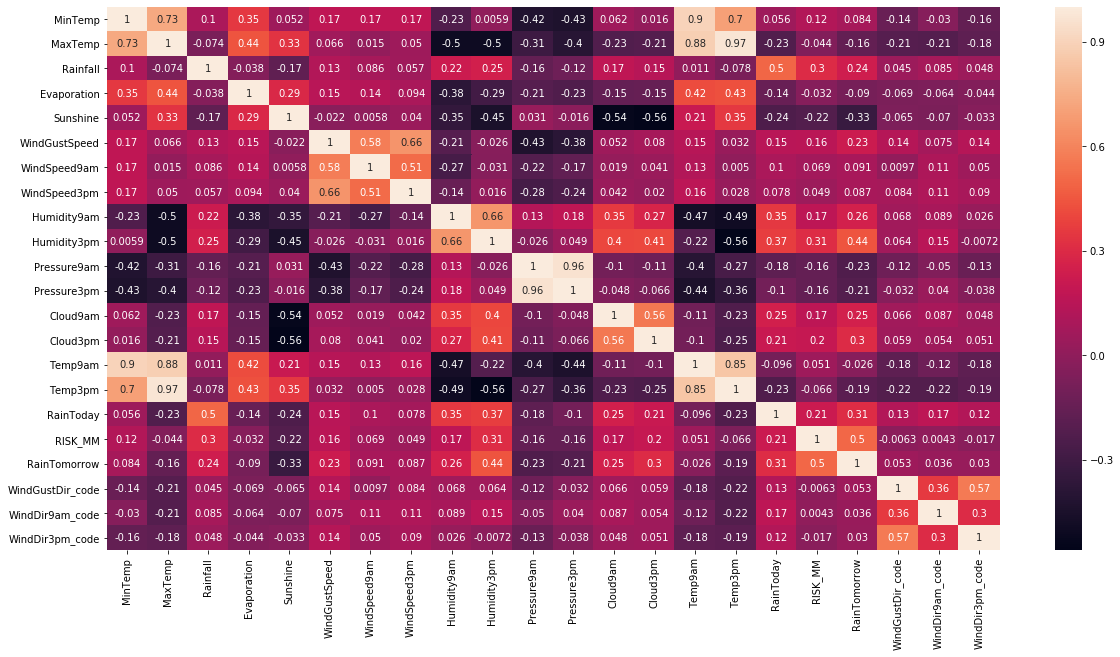

In [52]:
mat.figure(figsize= (20, 10))
sns.heatmap(wt_cpy.corr(),annot= True)

In [53]:
wt_cpy = wt_cpy.drop(['MaxTemp','Pressure9am','Temp9am'],axis=1)

In [54]:
wt_cpy.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDir_code,WindDir9am_code,WindDir3pm_code
0,13.4,0.6,5.46,7.62,44.0,20.0,24.0,71.0,22.0,1007.1,8.00,4.5,21.8,0,0.0,0,13,13,14
1,7.4,0.0,5.46,7.62,44.0,4.0,22.0,44.0,25.0,1007.8,4.43,4.5,24.3,0,0.0,0,14,6,15
2,12.9,0.0,5.46,7.62,46.0,19.0,26.0,38.0,30.0,1008.7,4.43,2.0,23.2,0,0.0,0,15,13,15
3,9.2,0.0,5.46,7.62,24.0,11.0,9.0,45.0,16.0,1012.8,4.43,4.5,26.5,0,1.0,0,4,9,0
4,17.5,1.0,5.46,7.62,41.0,7.0,20.0,82.0,33.0,1006.0,7.00,8.0,29.7,0,0.2,0,13,1,7


In [55]:
wt_cpy.shape

(142193, 19)

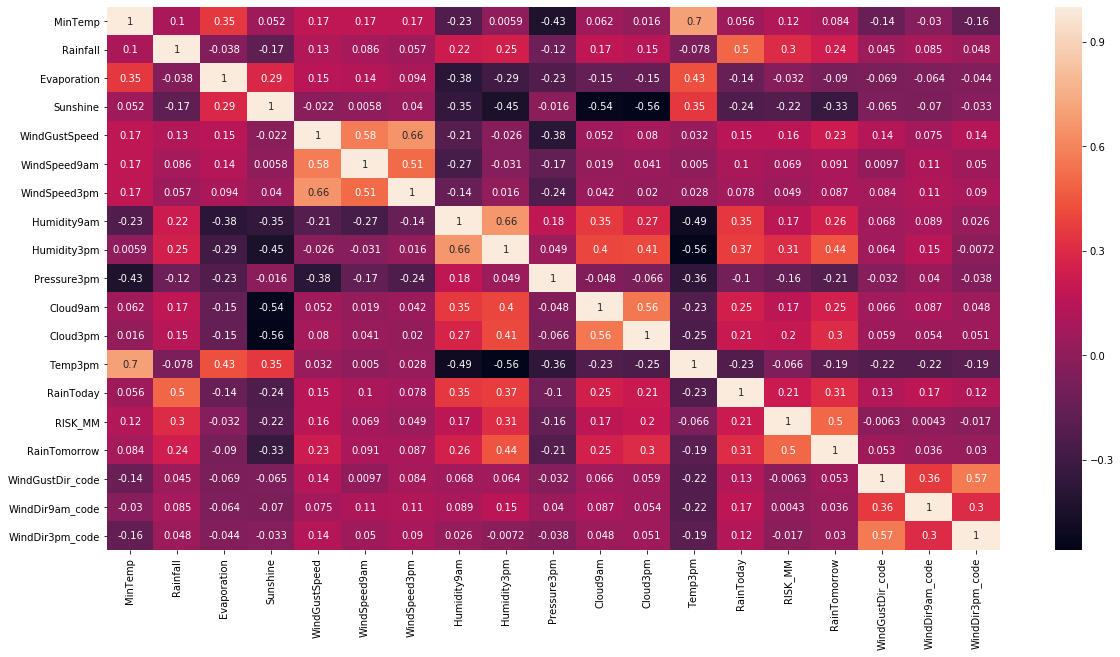

In [56]:
mat.figure(figsize= (20, 10))
sns.heatmap(wt_cpy.corr(),annot= True)

In [57]:
wt_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
MinTemp             142193 non-null float64
Rainfall            142193 non-null float64
Evaporation         142193 non-null float64
Sunshine            142193 non-null float64
WindGustSpeed       142193 non-null float64
WindSpeed9am        142193 non-null float64
WindSpeed3pm        142193 non-null float64
Humidity9am         142193 non-null float64
Humidity3pm         142193 non-null float64
Pressure3pm         142193 non-null float64
Cloud9am            142193 non-null float64
Cloud3pm            142193 non-null float64
Temp3pm             142193 non-null float64
RainToday           142193 non-null int32
RISK_MM             142193 non-null float64
RainTomorrow        142193 non-null int32
WindGustDir_code    142193 non-null int32
WindDir9am_code     142193 non-null int32
WindDir3pm_code     142193 non-null int32
dtypes: float64(14), int32(5)
memory usage: 17.9 MB


In [58]:
wt_cpy_train, wt_cpy_test = train_test_split(wt_cpy,test_size=0.2)

In [59]:
wt_cpy_trainx = wt_cpy_train.drop(['RainTomorrow'],axis=1)

In [60]:
wt_cpy_trainy = wt_cpy_train['RainTomorrow']

In [61]:
print("trainx{} & trainy{} sizes are".format(wt_cpy_trainx.shape,wt_cpy_trainy.shape))

trainx(113754, 18) & trainy(113754,) sizes are


In [62]:
wt_cpy_testx = wt_cpy_test.drop(['RainTomorrow'],axis=1)

In [63]:
wt_cpy_testy = wt_cpy_test['RainTomorrow']

In [64]:
print("testx{} & testy{} sizes are".format(wt_cpy_testx.shape,wt_cpy_testy.shape))

testx(28439, 18) & testy(28439,) sizes are


In [65]:
m2= logmod.fit(wt_cpy_trainx,wt_cpy_trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
p2 = m2.predict(wt_cpy_testx)

In [67]:
p2

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
confusion_matrix(wt_cpy_testy,p2)

array([[22048,     0],
       [    0,  6391]], dtype=int64)

In [69]:
accuracy_score(wt_cpy_testy,p2)

1.0

# Model with VIF

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [71]:
wt_vif = wt.drop(['RainTomorrow'],axis=1)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(wt_vif.values, i) for i in range(wt_vif.shape[1])]
vif["features"] = wt_vif.columns

In [73]:
vif

,VIF Factor,features
0,39.637506,MinTemp
1,262.557267,MaxTemp
2,1.541102,Rainfall
3,5.436107,Evaporation
4,16.269379,Sunshine
5,23.313383,WindGustSpeed
6,6.423999,WindSpeed9am
7,10.950913,WindSpeed3pm
8,52.037027,Humidity9am
9,38.508357,Humidity3pm


from this vif we can remove the variables which have high vif. We considered 10 as threshold to decide multicolinearity.
MinTemp, MaxTemp, Sunshine, WindGustSpeed, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

In [74]:
wt_1 = wt.drop(['MinTemp','MaxTemp','WindGustSpeed','WindSpeed3pm','Humidity9am','Humidity3pm','Sunshine','Pressure9am','Pressure3pm','Temp3pm','Temp9am'],axis=1) 

In [75]:
wt_1.shape

(142193, 11)

mat.figure(figsize= (20, 10))
sns.heatmap(wt_1.corr(),annot= True)

In [76]:
wt_1_train, wt_1_test = train_test_split(wt_1,test_size=0.2)

In [77]:
wt_1_trainx = wt_1_train.drop(['RainTomorrow'],axis=1)

In [78]:
wt_1_trainy = wt_1_train['RainTomorrow']

In [79]:
print("trainx{} & trainy{} sizes are".format(wt_1_trainx.shape,wt_1_trainy.shape))

trainx(113754, 10) & trainy(113754,) sizes are


In [80]:
wt_1_testx = wt_1_test.drop(['RainTomorrow'],axis=1)

In [81]:
wt_1_testy = wt_1_test['RainTomorrow']

In [82]:
print("testx{} & testy{} sizes are".format(wt_1_testx.shape,wt_1_testy.shape))

testx(28439, 10) & testy(28439,) sizes are


In [83]:
m3 = logmod.fit(wt_1_trainx,wt_1_trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
p3 = m3.predict(wt_1_testx)

In [85]:
confusion_matrix(wt_1_testy,p3)

array([[22128,     0],
       [    2,  6309]], dtype=int64)

In [86]:
accuracy_score(wt_1_testy,p3)

0.9999296740391715

# From Vif also we can't remove multicolinearity and we were getting 0.99 to 1 as result so we removed the each variable and calculated the accuracy by removing each variable.

Build a function to calculate accuracy 

In [87]:
Y= "RainTomorrow"
final_score = []
def calc_accuracy(wt):
    wt_func = wt.copy()
    for i in wt.columns:
        wt_func = wt
        if i != Y:
            wt_func = wt_func.drop([i],axis=1)
            wt_train2, wt_test2 = train_test_split(wt_func,test_size=0.2)
            wt__trainx2 = wt_train2.drop(['RainTomorrow'],axis=1)
            wt_trainy2 = wt_train2['RainTomorrow']
            wt_testx2 = wt_test2.drop(['RainTomorrow'],axis=1)
            wt_testy2 = wt_test2['RainTomorrow']
            m4 = logmod.fit(wt__trainx2,wt_trainy2)
            p4 = m4.predict(wt_testx2)
            res = accuracy_score(wt_testy2,p4)
            print("Name of dropped column is {} and accuracy with all other variable is {}".format(i,res))
            final_score.append(res)
        else:
            print("\n'{}' is target variable".format(i))
            
    return (1)

In [88]:
calc_accuracy(wt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is MinTemp and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is MaxTemp and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Rainfall and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Evaporation and accuracy with all other variable is 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Sunshine and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindGustSpeed and accuracy with all other variable is 0.9998593480783431


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindSpeed9am and accuracy with all other variable is 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindSpeed3pm and accuracy with all other variable is 0.9998945110587574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Humidity9am and accuracy with all other variable is 0.9998945110587574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Humidity3pm and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Pressure9am and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Pressure3pm and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Cloud9am and accuracy with all other variable is 0.9998945110587574


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Cloud3pm and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Temp9am and accuracy with all other variable is 0.9999296740391715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is Temp3pm and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is RainToday and accuracy with all other variable is 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is RISK_MM and accuracy with all other variable is 0.8408171876648265

'RainTomorrow' is target variable


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindGustDir_code and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindDir9am_code and accuracy with all other variable is 0.9999648370195858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Name of dropped column is WindDir3pm_code and accuracy with all other variable is 1.0


1

From above function we can conclude that RISK_MM is highly correleated with target variable and by removing the RISK_MM we have build final model

# Final model

In [90]:
wt_cpy1 = wt.drop(["RISK_MM"],axis=1)

In [91]:
wt_cpy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
MinTemp             142193 non-null float64
MaxTemp             142193 non-null float64
Rainfall            142193 non-null float64
Evaporation         142193 non-null float64
Sunshine            142193 non-null float64
WindGustSpeed       142193 non-null float64
WindSpeed9am        142193 non-null float64
WindSpeed3pm        142193 non-null float64
Humidity9am         142193 non-null float64
Humidity3pm         142193 non-null float64
Pressure9am         142193 non-null float64
Pressure3pm         142193 non-null float64
Cloud9am            142193 non-null float64
Cloud3pm            142193 non-null float64
Temp9am             142193 non-null float64
Temp3pm             142193 non-null float64
RainToday           142193 non-null int32
RainTomorrow        142193 non-null int32
WindGustDir_code    142193 non-null int32
WindDir9am_code     142193 non-null int32
WindDir3pm_code  

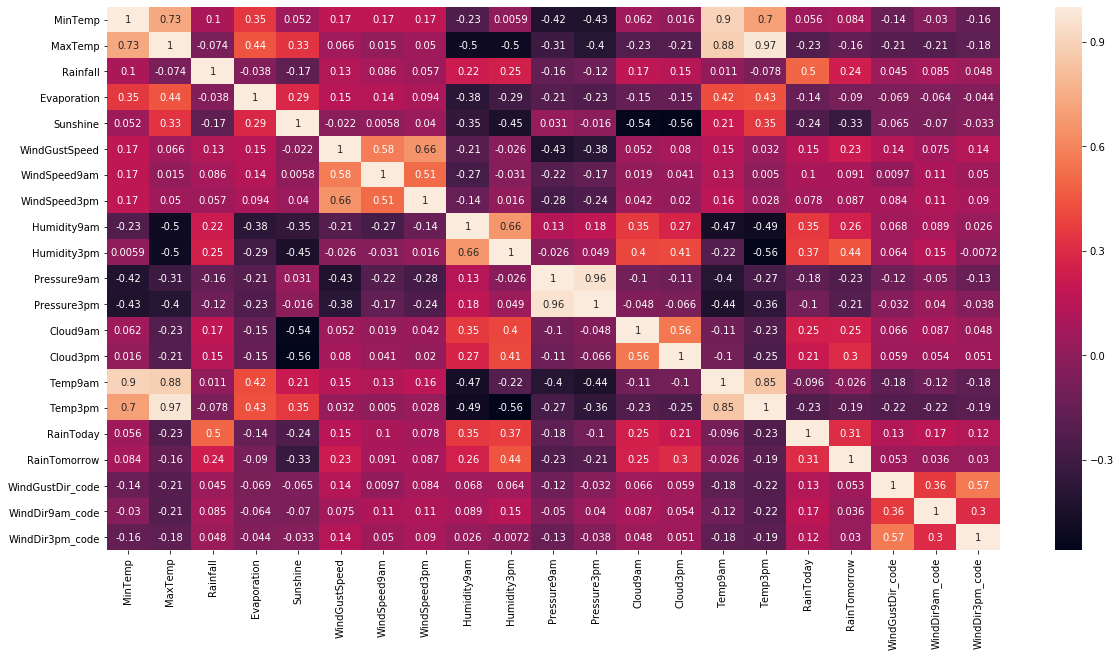

In [92]:
mat.figure(figsize= (20, 10))
sns.heatmap(wt_cpy1.corr(),annot= True)

In [93]:
wt_cpy1_train, wt_cpy1_test = train_test_split(wt_cpy1,test_size=0.2)

In [94]:
wt_cpy1_trainx = wt_cpy1_train.drop(['RainTomorrow'],axis=1)

In [95]:
wt_cpy1_trainy = wt_cpy1_train['RainTomorrow']

In [96]:
print("trainx{} & trainy{} sizes are".format(wt_cpy1_trainx.shape,wt_cpy1_trainy.shape))

trainx(113754, 20) & trainy(113754,) sizes are


In [97]:
wt_cpy1_testx = wt_cpy1_test.drop(['RainTomorrow'],axis=1)

In [98]:
wt_cpy1_testy = wt_cpy1_test['RainTomorrow']

In [99]:
print("testx{} & testy{} sizes are".format(wt_cpy1_testx.shape,wt_cpy1_testy.shape))

testx(28439, 20) & testy(28439,) sizes are


In [100]:
m5 = logmod.fit(wt_cpy1_trainx,wt_cpy1_trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
p5 = m3.predict(wt_cpy1_testx)

In [102]:
confusion_matrix(wt_cpy1_testy,p5)

array([[20855,  1222],
       [ 3453,  2909]], dtype=int64)

In [103]:
accuracy_score(wt_cpy1_testy,p5)

0.835613066563522